In [1]:
import pandas as pd

# Load the datasets
dataset_1 = pd.read_csv('dataset_1_colon_cancer.csv')
dataset_2 = pd.read_csv('dataset_2_colon_cancer.csv')

# Display the first few rows and basic info for each dataset
dataset_1_head = dataset_1.head()
dataset_1_info = dataset_1.info()

dataset_2_head = dataset_2.head()
dataset_2_info = dataset_2.info()

dataset_1_head, dataset_1_info, dataset_2_head, dataset_2_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AGE                   300 non-null    int64  
 1   CEA Level             300 non-null    float64
 2   Colonoscopy Result    300 non-null    object 
 3   Polyp Size (mm)       300 non-null    float64
 4   Family History        300 non-null    object 
 5   Type of Colon Cancer  300 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 14.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Tumor Grade             100 non-null    int64 
 1   Biopsy Result           100 non-null    object
 2   Lymph Node Involvement  100 non-null    object
 3   Bowel Obstruction       100 non-null    object
 4   Smoki

(   AGE  CEA Level Colonoscopy Result  Polyp Size (mm) Family History  \
 0   78  17.361410             Normal        14.969663             No   
 1   68  14.008226             Normal         9.495306            Yes   
 2   54  12.445401             Normal        44.941506            Yes   
 3   82   4.139308           Abnormal         4.931454             No   
 4   47   8.935027             Normal        26.701058             No   
 
    Type of Colon Cancer  
 0                     1  
 1                     1  
 2                     3  
 3                     1  
 4                     2  ,
 None,
    Tumor Grade Biopsy Result Lymph Node Involvement Bowel Obstruction  \
 0            3      Positive                    Yes               Yes   
 1            3      Negative                    Yes               Yes   
 2            2      Negative                     No                No   
 3            1      Negative                    Yes                No   
 4            1     

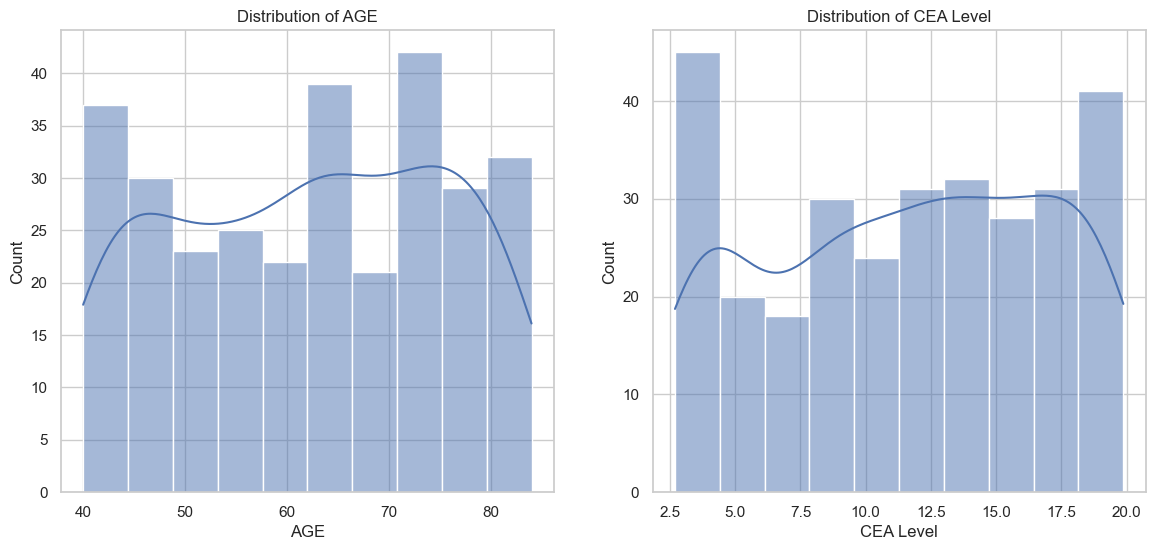

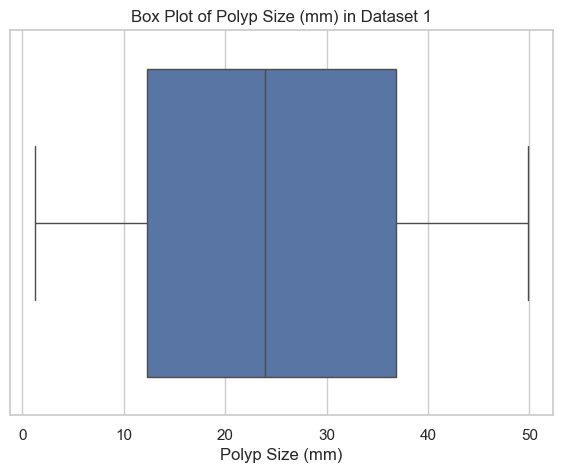

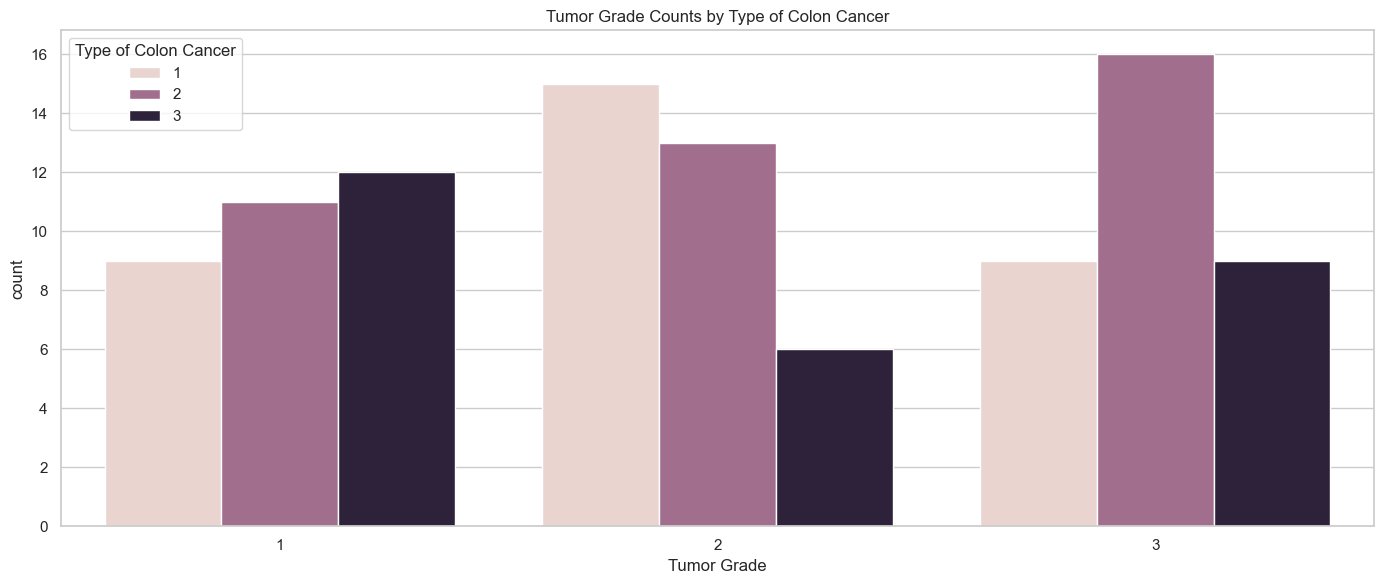

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Plot distributions for numeric features in Dataset 1
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(dataset_1['AGE'], kde=True, ax=axes[0])
axes[0].set_title("Distribution of AGE")
sns.histplot(dataset_1['CEA Level'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of CEA Level")

# Box plot for outliers in Polyp Size for Dataset 1
plt.figure(figsize=(7, 5))
sns.boxplot(x=dataset_1['Polyp Size (mm)'])
plt.title("Box Plot of Polyp Size (mm) in Dataset 1")

# Plot counts for categorical variables in Dataset 2
plt.figure(figsize=(14, 6))
sns.countplot(data=dataset_2, x='Tumor Grade', hue='Type of Colon Cancer')
plt.title("Tumor Grade Counts by Type of Colon Cancer")

plt.tight_layout()
plt.show()

In [3]:
# Merge both datasets on the 'Type of Colon Cancer' column using an inner join to ensure alignment by cancer type
merged_data = pd.merge(dataset_1, dataset_2, on='Type of Colon Cancer', how='inner')

# Display the first few rows of the merged dataset to confirm the merge
merged_data_head = merged_data.head()
merged_data_info = merged_data.info()

merged_data_head, merged_data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10059 entries, 0 to 10058
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     10059 non-null  int64  
 1   CEA Level               10059 non-null  float64
 2   Colonoscopy Result      10059 non-null  object 
 3   Polyp Size (mm)         10059 non-null  float64
 4   Family History          10059 non-null  object 
 5   Type of Colon Cancer    10059 non-null  int64  
 6   Tumor Grade             10059 non-null  int64  
 7   Biopsy Result           10059 non-null  object 
 8   Lymph Node Involvement  10059 non-null  object 
 9   Bowel Obstruction       10059 non-null  object 
 10  Smoking History         10059 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 864.6+ KB


(   AGE  CEA Level Colonoscopy Result  Polyp Size (mm) Family History  \
 0   78   17.36141             Normal        14.969663             No   
 1   78   17.36141             Normal        14.969663             No   
 2   78   17.36141             Normal        14.969663             No   
 3   78   17.36141             Normal        14.969663             No   
 4   78   17.36141             Normal        14.969663             No   
 
    Type of Colon Cancer  Tumor Grade Biopsy Result Lymph Node Involvement  \
 0                     1            3      Negative                    Yes   
 1                     1            2      Positive                    Yes   
 2                     1            2      Positive                     No   
 3                     1            3      Negative                    Yes   
 4                     1            2      Negative                    Yes   
 
   Bowel Obstruction Smoking History  
 0                No      Non-Smoker  
 1          

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical features
label_encoders = {}
for col in merged_data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    merged_data[col] = le.fit_transform(merged_data[col])
    label_encoders[col] = le  # Store encoder for future reference

# Scale numerical features
scaler = StandardScaler()
numeric_cols = merged_data.select_dtypes(include=['float64', 'int64']).columns.difference(['Type of Colon Cancer'])
merged_data[numeric_cols] = scaler.fit_transform(merged_data[numeric_cols])

# Display the processed data head and summary statistics
processed_data_head = merged_data.head()
processed_data_description = merged_data.describe()

processed_data_head, processed_data_description


(        AGE  CEA Level  Colonoscopy Result  Polyp Size (mm)  Family History  \
 0  1.190566   1.108549                   1        -0.693721               0   
 1  1.190566   1.108549                   1        -0.693721               0   
 2  1.190566   1.108549                   1        -0.693721               0   
 3  1.190566   1.108549                   1        -0.693721               0   
 4  1.190566   1.108549                   1        -0.693721               0   
 
    Type of Colon Cancer  Tumor Grade  Biopsy Result  Lymph Node Involvement  \
 0                     1     1.202958              0                       1   
 1                     1    -0.029027              1                       1   
 2                     1    -0.029027              1                       0   
 3                     1     1.202958              0                       1   
 4                     1    -0.029027              0                       1   
 
    Bowel Obstruction  Smoking Histo

1. Feature Engineering: Creating new features.
2. Model Selection: Logistic Regression and Random Forest.
3. Model Optimization: GridSearchCV for hyperparameter tuning.
4. Evaluation: Metrics for assessing model performance and feature importance analysis.

# Feature Engineering

In [ ]:
# Creating Risk Indicator: Combining Family History and Smoking History
merged_data['Risk Indicator'] = merged_data['Family History'] * merged_data['Smoking History']

# Creating Severity Index: Combining Tumor Grade, Lymph Node Involvement, and Bowel Obstruction
merged_data['Severity Index'] = merged_data['Tumor Grade'] + merged_data['Lymph Node Involvement'] + merged_data['Bowel Obstruction']

# Display the new features in the dataset
merged_data.head()


,AGE,CEA Level,Colonoscopy Result,Polyp Size (mm),Family History,Type of Colon Cancer,Tumor Grade,Biopsy Result,Lymph Node Involvement,Bowel Obstruction,Smoking History,Risk Indicator,Severity Index
0,1.190566,1.108549,1,-0.693721,0,1,1.202958,0,1,0,0,0,2.202958
1,1.190566,1.108549,1,-0.693721,0,1,-0.029027,1,1,0,0,0,0.970973
2,1.190566,1.108549,1,-0.693721,0,1,-0.029027,1,0,0,1,0,-0.029027
3,1.190566,1.108549,1,-0.693721,0,1,1.202958,0,1,0,1,0,2.202958
4,1.190566,1.108549,1,-0.693721,0,1,-0.029027,0,1,1,0,0,1.970973


# Model Selection

In [6]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = merged_data.drop(columns=['Type of Colon Cancer'])
y = merged_data['Type of Colon Cancer']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize models
lr_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train the Logistic Regression model
lr_model.fit(X_train, y_train)

# Train the Random Forest model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Model Performance

In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for Logistic Regression and Random Forest
lr_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid Search for Logistic Regression
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid_search.fit(X_train, y_train)

# Grid Search for Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best models after grid search
best_lr_model = lr_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_


# Model Evaluation

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions with the optimized models
lr_preds = best_lr_model.predict(X_test)
rf_preds = best_rf_model.predict(X_test)

# Evaluate Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_precision = precision_score(y_test, lr_preds, average='weighted')
lr_recall = recall_score(y_test, lr_preds, average='weighted')
lr_f1 = f1_score(y_test, lr_preds, average='weighted')

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds, average='weighted')
rf_recall = recall_score(y_test, rf_preds, average='weighted')
rf_f1 = f1_score(y_test, rf_preds, average='weighted')

# Display evaluation metrics
print("Logistic Regression Evaluation Metrics:")
print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1 Score: {lr_f1}")

print("\nRandom Forest Evaluation Metrics:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")


Logistic Regression Evaluation Metrics:
Accuracy: 0.4463220675944334
Precision: 0.44490973574598836
Recall: 0.4463220675944334
F1 Score: 0.4315946444731676

Random Forest Evaluation Metrics:
Accuracy: 0.9244532803180915
Precision: 0.9255164306902146
Recall: 0.9244532803180915
F1 Score: 0.9239162534360918


# Feature Importance

In [10]:
import numpy as np

# Get feature importances from Random Forest model
rf_feature_importances = best_rf_model.feature_importances_

# Display feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)


Feature Importances:
                   Feature  Importance
1                CEA Level    0.225138
3          Polyp Size (mm)    0.207671
0                      AGE    0.184574
11          Severity Index    0.097892
6            Biopsy Result    0.076942
9          Smoking History    0.042734
5              Tumor Grade    0.035224
8        Bowel Obstruction    0.031318
2       Colonoscopy Result    0.028316
4           Family History    0.027216
7   Lymph Node Involvement    0.026185
10          Risk Indicator    0.016790


c:\Users\tusha\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


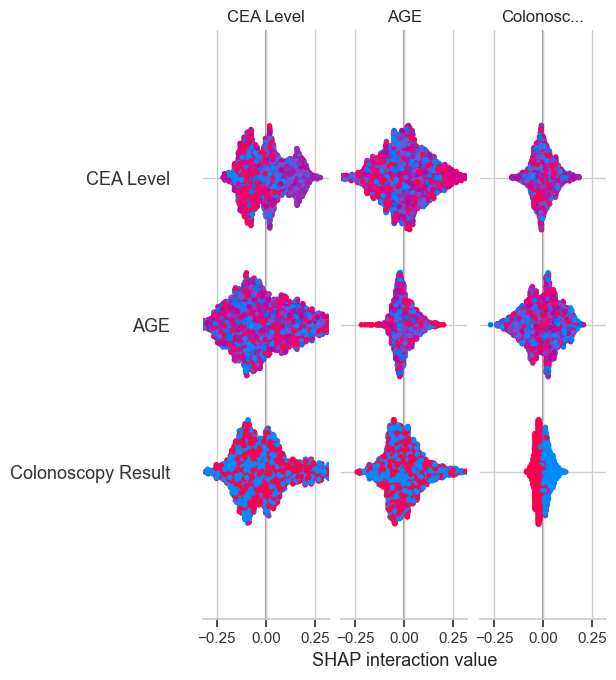

In [11]:
import shap

# Explain predictions using SHAP
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)
